# NewsGroup Dataset - Unsupervised Learning
* We'll use NLP Techniques to apply unsupervised algorithms for clustering news articles (20 groups). 
* We'll download the dataset from scikit-learn datasets. The information can be downloaded from here:
http://qwone.com/~jason/20Newsgroups/

# Exercises

* Do you think all of the top 500-word tokens contain valuable information? If not, can you impose another list of stop words?
* Can you use stemming instead of lemmatization to process the newsgroups data?
* Can you increase max_features in CountVectorizer from 500 to 1000 and see how the t-SNE visualization will be affected?
* Try visualizing documents from six topics (similar or dissimilar) and tweak parameters so that the formed clusters look reasonable.

# Step 1: Loading the data

In [1]:
from sklearn.datasets import fetch_20newsgroups
import numpy as np
import pandas as pd

# Downloading the dataset with all the default parameters
groups = fetch_20newsgroups()


## Text Preprocessing
* We'll filter out any data that is numeric
* We'll also drop the stop words (common words that provide little value in helping to differentiate the documents). 
* As part of Exercise 1, we'll also drop some of the words that are common across all topics. 
* As part of Exercise 2, we'll use stemming instead of lemmatizing. 
* As part of Exercise 3, we'll use 1000 max_features

In [2]:
# We'll put together a model that considers preprocessing, dropping stop words, lemmatizing and count vectorizing
# Importing required libraries from nltk corpus and nltk stem
from nltk.corpus import names
from nltk.stem.porter import PorterStemmer
from sklearn.feature_extraction.text import ENGLISH_STOP_WORDS
from sklearn.feature_extraction.text import CountVectorizer


# Creating a set of all names. This is done because we'll be removing these from our documents.
all_names = set(names.words())

# Initializing a WordNet Lemmatizer. This will be used to reduce words to their base or root form.
stemmer = PorterStemmer()

# Creating an empty list to store our cleaned data.
data_cleaned = []

# For each document in our data
for doc in groups.data:
    # Convert the document to lowercase.
    doc = doc.lower()
    # Lemmatize each word in the document, remove names, and join the words back into a string.
    # We're also checking that the word is alphabetic.
    doc_cleaned = " ".join(stemmer.stem(word) for word in doc.split() if word.isalpha() and word not in all_names)
    data_cleaned.append(doc_cleaned)
    
# Creating a Count Vectorizer. We're telling it to remove English stop words and only consider the top 500 features (words).
# Based on the 500 words we've found, we'll remove some of the words (manually) that appear common to most documents
# This is because common words will not provide specific information about the topic of a document
additional_stop_words = ['able', 'accept', 'act', 'actually', 'ago', 'anybody', 'april', 'ask', 'better', 'big', 'ca', 'came', 'come', 'consider', 'david', 'cut', 'did', 'doing', 'exactly', 'got', 'ha', 'include', 'know', 'la', 'le', 'today', 'wa']

stop_words = list(ENGLISH_STOP_WORDS.union(additional_stop_words))

count_vector_sw = CountVectorizer(stop_words=stop_words, max_features = 1000)

# Using our CountVectorizer to transform our cleaned data into a count matrix.
data_cleaned_count = count_vector_sw.fit_transform(data_cleaned)
print(count_vector_sw.get_feature_names_out())


['abil' 'abl' 'abov' 'absolut' 'acceler' 'access' 'accord' 'account'
 'action' 'activ' 'actual' 'ad' 'add' 'addit' 'address' 'administr'
 'admit' 'advanc' 'advic' 'age' 'agenc' 'agre' 'aid' 'air' 'al'
 'algorithm' 'allow' 'alreadi' 'altern' 'alway' 'amend' 'american' 'angel'
 'ani' 'anim' 'announc' 'anonym' 'anoth' 'answer' 'anybodi' 'anyon'
 'anyth' 'appar' 'appear' 'appl' 'appli' 'applic' 'appreci' 'approach'
 'appropri' 'apr' 'arab' 'archiv' 'area' 'argu' 'argument' 'arm' 'armenia'
 'armenian' 'articl' 'associ' 'assum' 'atheist' 'attack' 'attempt'
 'author' 'automat' 'avail' 'averag' 'avoid' 'away' 'bad' 'bank' 'base'
 'basebal' 'basi' 'basic' 'bb' 'bear' 'beat' 'becaus' 'becom' 'befor'
 'begin' 'belief' 'believ' 'best' 'bibl' 'bike' 'billion' 'bit' 'black'
 'block' 'blood' 'blue' 'board' 'bob' 'bodi' 'book' 'boston' 'bought'
 'box' 'break' 'bring' 'brought' 'bu' 'build' 'built' 'burn' 'busi' 'buy'
 'cabl' 'california' 'canada' 'capabl' 'car' 'card' 'care' 'carri' 'case'
 'caus' 'cd

## Visualizing the data using t-Stochastic Neighbor Embedding (tSNE)
* As part of Exercise 4, we'll visualize 6 grops (articles)
** 2 of the 6 articles are similar, while the other ones are very different so we're expecting to see clustering ** 
* We'll also use 1000 max_features, but we'll continue using the English Words stoplist and the lemmatizer model

In [8]:
from sklearn.manifold import TSNE
from nltk.stem import WordNetLemmatizer

# We'll try to visualize three distinct topics
categories_6 = ['talk.religion.misc','alt.atheism', 'comp.graphics', 'rec.sport.hockey', 'rec.motorcycles', 'sci.space']
groups_6 = fetch_20newsgroups(categories=categories_6)


# Creating a set of all names. This is done because we'll be removing these from our documents.
all_names = set(names.words())

# Creating a Count Vectorizer. We're telling it to remove English stop words and only consider the top 500 features (words).
count_vector_sw = CountVectorizer(stop_words="english", max_features = 1000)

# Initializing a WordNet Lemmatizer. This will be used to reduce words to their base or root form.
lemmatizer = WordNetLemmatizer()

# Creating an empty list to store our cleaned data.
data_cleaned_count_6 = []

# For each document in our data
for doc in groups_6.data:
    # Convert the document to lowercase.
    doc = doc.lower()
    # Lemmatize each word in the document, remove names, and join the words back into a string.
    # We're also checking that the word is alphabetic.
    doc_cleaned = " ".join(lemmatizer.lemmatize(word) for word in doc.split() if word.isalpha() and word not in all_names)
    data_cleaned_count_6.append(doc_cleaned)
# Using our CountVectorizer to transform our cleaned data into a count matrix.
data_cleaned_count_6 = count_vector_sw.fit_transform(data_cleaned_count_6)
data_cleaned_count_6


<3232x1000 sparse matrix of type '<class 'numpy.int64'>'
	with 104621 stored elements in Compressed Sparse Row format>

In [9]:
# Next, we apply t-SNE to reduce the 1000-dimensional matrix to a two-dimensional matrix:
tsne_model = TSNE(n_components=2, perplexity=40, random_state=42, learning_rate=500)

data_tsne = tsne_model.fit_transform(data_cleaned_count_6.toarray())


With the previous code, we've successfully reduced the input dimension from 1000 to 2. 

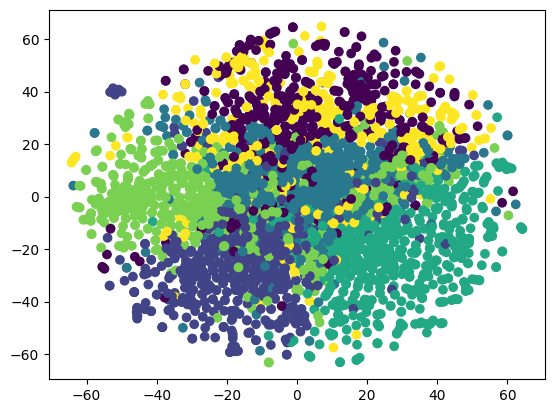

In [10]:
# Visualizing our data topic labels in 2 dimensions
import matplotlib.pyplot as plt
plt.scatter(data_tsne[:, 0], data_tsne[:, 1], c=groups_6.target)
plt.show()